<a href="https://colab.research.google.com/github/emma-rose22/Music-Instagram-Analysis/blob/master/Music_Instagram_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot
import seaborn as sns

In [2]:
tours = pd.read_excel('https://github.com/emma-rose22/Music-Instagram-Analysis/raw/master/2018Top200ToursE.xlsx')
tours.to_csv('2018Top200Tours.csv', encoding='utf-8')
tours.head()

,Rank,Gross Millions,Artist,Average Ticket Price,Average Tickets,Total Tickets,Average Gross,Cities/Shows,Agency,Number of Members,Instagram Followers,Years Active
0,1,277.3,Taylor Swift,124.99,80322,2168706,10271531.0,27/40,Messina Touring Group,1.0,122000000.0,15.0
1,2,166.4,Jay-Z / Beyonce,128.23,54085,1298038,6935409.0,24/30,Live Nation,2.0,135000000.0,27.0
2,3,166.0,Eagles,172.13,21428,964245,3688308.0,45/53,Creative Artists Agency,3.0,NaN,34.0
3,4,114.4,Kenny Chesney,88.15,32443,1297731,2860007.0,40/42,Dale Morris & Associates,1.0,1300000.0,31.0
4,5,110.0,Justin Timberlake,138.87,19795,791780,2748832.0,40/50,WME,1.0,56600000.0,27.0


##Workspace for original dataframe

In [3]:
#Lets take a peek
tours.head()

,Rank,Gross Millions,Artist,Average Ticket Price,Average Tickets,Total Tickets,Average Gross,Cities/Shows,Agency,Number of Members,Instagram Followers,Years Active
0,1,277.3,Taylor Swift,124.99,80322,2168706,10271531.0,27/40,Messina Touring Group,1.0,122000000.0,15.0
1,2,166.4,Jay-Z / Beyonce,128.23,54085,1298038,6935409.0,24/30,Live Nation,2.0,135000000.0,27.0
2,3,166.0,Eagles,172.13,21428,964245,3688308.0,45/53,Creative Artists Agency,3.0,NaN,34.0
3,4,114.4,Kenny Chesney,88.15,32443,1297731,2860007.0,40/42,Dale Morris & Associates,1.0,1300000.0,31.0
4,5,110.0,Justin Timberlake,138.87,19795,791780,2748832.0,40/50,WME,1.0,56600000.0,27.0


In [4]:
#excel was convinced some of the ratios of cities to shows were dates
#so here I am fixing that manually 

tours.iloc[30, tours.columns.get_loc('Cities/Shows')] = '17/12'
tours.iloc[32, tours.columns.get_loc('Cities/Shows')] = '1/45'
tours.iloc[51, tours.columns.get_loc('Cities/Shows')] = '7/4'
tours.iloc[83, tours.columns.get_loc('Cities/Shows')] = '30/1'
tours.iloc[88, tours.columns.get_loc('Cities/Shows')] = '13/8'
tours.iloc[99, tours.columns.get_loc('Cities/Shows')] = '19/6'
tours.iloc[67, tours.columns.get_loc('Cities/Shows')] = '11/10'
tours.iloc[68, tours.columns.get_loc('Cities/Shows')] = '11/11'
tours.iloc[72, tours.columns.get_loc('Cities/Shows')] = '7/4'
tours.iloc[75, tours.columns.get_loc('Cities/Shows')] = '11/11'


tours.head(10)


,Rank,Gross Millions,Artist,Average Ticket Price,Average Tickets,Total Tickets,Average Gross,Cities/Shows,Agency,Number of Members,Instagram Followers,Years Active
0,1,277.3,Taylor Swift,124.99,80322,2168706,10271531.0,27/40,Messina Touring Group,1.0,122000000.0,15.0
1,2,166.4,Jay-Z / Beyonce,128.23,54085,1298038,6935409.0,24/30,Live Nation,2.0,135000000.0,27.0
2,3,166.0,Eagles,172.13,21428,964245,3688308.0,45/53,Creative Artists Agency,3.0,NaN,34.0
3,4,114.4,Kenny Chesney,88.15,32443,1297731,2860007.0,40/42,Dale Morris & Associates,1.0,1300000.0,31.0
4,5,110.0,Justin Timberlake,138.87,19795,791780,2748832.0,40/50,WME,1.0,56600000.0,27.0
5,6,105.0,Ed Sheeran,92.42,54119,1136497,5001537.0,21/24,Paradigm Talent Agency,1.0,346000.0,15.0
6,7,97.8,Journey / Def Leppard,97.79,17246,1000272,1686460.0,58/60,CAA / Artist Group International,10.0,823000.0,40.5
7,8,95.3,Pink,138.46,18120,688558,2508798.0,38/46,Marshall Arts,1.0,7200000.0,24.0
8,9,88.3,Springsteen On Broadway,508.93,4231,173461,2153146.0,41/183,Thrill Hill Productions,NaN,NaN,2.0
9,10,79.0,Drake,116.46,35706,678410,4158145.0,19/43,WME,1.0,NaN,18.0


####seperate the cities/shows into two seperate columns 

In [5]:
s1 = pd.DataFrame(tours['Cities/Shows'].str.split('/', expand=True), tours['Rank'])
s1.head()

,0,1
Rank,,
1,24,30
2,45,53
3,40,42
4,40,50
5,21,24


In [6]:
s1.columns = ['Cities', 'Shows']
s1.head()

,Cities,Shows
Rank,,
1,24,30
2,45,53
3,40,42
4,40,50
5,21,24


In [7]:
tours2 = pd.merge(s1, tours, how= 'outer', on='Rank')
print(tours2.shape)

tours2.head(3)

(200, 14)


,Rank,Cities,Shows,Gross Millions,Artist,Average Ticket Price,Average Tickets,Total Tickets,Average Gross,Cities/Shows,Agency,Number of Members,Instagram Followers,Years Active
0,1,24,30,277.3,Taylor Swift,124.99,80322,2168706,10271531.0,27/40,Messina Touring Group,1.0,122000000.0,15.0
1,2,45,53,166.4,Jay-Z / Beyonce,128.23,54085,1298038,6935409.0,24/30,Live Nation,2.0,135000000.0,27.0
2,3,40,42,166.0,Eagles,172.13,21428,964245,3688308.0,45/53,Creative Artists Agency,3.0,NaN,34.0


In [8]:
#here I am fixing an error in one artist's years active
tours2['Years Active']

0      15.0
1      27.0
2      34.0
3      31.0
4      27.0
       ... 
195    21.0
196    44.0
197    30.0
198    14.0
199    19.0
Name: Years Active, Length: 200, dtype: float64

In [9]:
tours2['Years Active'] = tours2['Years Active'].replace(2, 55)
tours2.head()

,Rank,Cities,Shows,Gross Millions,Artist,Average Ticket Price,Average Tickets,Total Tickets,Average Gross,Cities/Shows,Agency,Number of Members,Instagram Followers,Years Active
0,1,24,30,277.3,Taylor Swift,124.99,80322,2168706,10271531.0,27/40,Messina Touring Group,1.0,122000000.0,15.0
1,2,45,53,166.4,Jay-Z / Beyonce,128.23,54085,1298038,6935409.0,24/30,Live Nation,2.0,135000000.0,27.0
2,3,40,42,166.0,Eagles,172.13,21428,964245,3688308.0,45/53,Creative Artists Agency,3.0,NaN,34.0
3,4,40,50,114.4,Kenny Chesney,88.15,32443,1297731,2860007.0,40/42,Dale Morris & Associates,1.0,1300000.0,31.0
4,5,21,24,110.0,Justin Timberlake,138.87,19795,791780,2748832.0,40/50,WME,1.0,56600000.0,27.0


#Workspace for split dataframes




##Comparing the top 50 oldest musicians to the top 50 musicians on the list with the most Instagram followers

In [10]:
older_musicians = tours2.sort_values('Years Active', ascending=False)
older_musicians.head(3)

,Rank,Cities,Shows,Gross Millions,Artist,Average Ticket Price,Average Tickets,Total Tickets,Average Gross,Cities/Shows,Agency,Number of Members,Instagram Followers,Years Active
43,44,34,34,25.8,Rod Stewart,83.58,11417,308266,954282.0,27/28,Artist Group International,1.0,347000.0,68.0
40,41,39,39,27.5,Paul Simon,98.07,13329,279919,1307250.0,21/24,Creative Artists Agency,1.0,36300.0,63.0
78,79,14,95,16.1,Willie Nelson,66.81,5123,240767,342229.0,47/50,Creative Artists Agency,1.0,546000.0,63.0


In [11]:
older_musicians = older_musicians.iloc[0:50]
older_musicians.shape

(50, 14)

In [12]:
ig_famous= tours2.sort_values('Instagram Followers', ascending=False)
ig_famous.head(3)

,Rank,Cities,Shows,Gross Millions,Artist,Average Ticket Price,Average Tickets,Total Tickets,Average Gross,Cities/Shows,Agency,Number of Members,Instagram Followers,Years Active
1,2,45,53,166.4,Jay-Z / Beyonce,128.23,54085,1298038,6935409.0,24/30,Live Nation,2.0,135000000.0,27.0
0,1,24,30,277.3,Taylor Swift,124.99,80322,2168706,10271531.0,27/40,Messina Touring Group,1.0,122000000.0,15.0
32,33,13,14,33.7,Jennifer Lopez,195.79,3830,172332,749787.0,1/45,Creative Artists Agency,1.0,105000000.0,33.0


In [13]:
ig_famous = ig_famous.iloc[0:50]
ig_famous.shape

(50, 14)

In [14]:
ig_kinda_famous = tours2.sort_values('Instagram Followers', ascending=True)
ig_kinda_famous.head()

,Rank,Cities,Shows,Gross Millions,Artist,Average Ticket Price,Average Tickets,Total Tickets,Average Gross,Cities/Shows,Agency,Number of Members,Instagram Followers,Years Active
191,192,NaN,NaN,5.2,Frankie Valli And The Four Seasons,74.68,3172,236879,NaN,NaN,NaN,11.0,2300.0,59.0
133,134,NaN,NaN,8.6,Mannheim Steamroller,59.42,2425,144071,NaN,NaN,NaN,20.0,3000.0,45.0
177,178,NaN,NaN,5.9,Rain - A Tribute To The Beatles,54.38,2017,109695,NaN,NaN,NaN,14.0,4500.0,44.0
65,66,38,38,18.9,The Illusionists,59.80,4216,316209,252121.0,75/189,WME,7.0,28300.0,7.0
184,185,NaN,NaN,5.7,Los Enanitos Verdes / Hombres G,45.35,8319,377308,NaN,NaN,NaN,8.0,29600.0,32.0


In [15]:
ig_kinda_famous = ig_kinda_famous.iloc[0:50]
ig_kinda_famous.shape

(50, 14)

####Compare directly

In [16]:
ig_famous['Years Active'].mean()

18.979591836734695

In [17]:
ig_famous['Instagram Followers'].mean()

33572000.0

In [18]:
older_musicians['Years Active'].mean()

#on average about 30 years more experience

50.61

In [19]:
older_musicians['Instagram Followers'].mean()
#on average 31 million less followers

1658012.5

####Rank

In [20]:
older_musicians['Rank'].mean()

103.82

In [21]:
ig_famous['Rank'].mean()

#people who are instagram famous tend to be higher up on the ranking list

82.32

####Millions grossed

In [22]:
older_musicians['Gross Millions'].mean()

18.816000000000003

In [23]:
ig_famous['Gross Millions'].mean()

#people who are instagram famous tend to make more money(unsurprising, they are ranked by this metric)

30.314

In [24]:
ig_famous_test = ig_famous.iloc[2:50]
ig_famous_test['Gross Millions'].mean()

#after making my graphs I saw that two outliers were really skewing my mean, so I left
#our two highest grossing out and our mean has dropped by 8 million

22.33333333333334

####Tickets per show

In [25]:
older_musicians['Average Tickets'].mean()

9432.3

In [26]:
ig_famous['Average Tickets'].mean()

#The top 50 instagram famous people tend to sell an average of 4,004 more tickets than the top 50 oldest musicians

13540.06

####Total Tickets

In [27]:
older_musicians['Total Tickets'].mean()

542909.58

In [28]:
ig_famous['Total Tickets'].mean()
#insta famous musicians sold an average of 108,273 tickets less than older musicians 

447236.46

####Ticket price

In [29]:
older_musicians['Average Ticket Price'].mean()

97.7156

In [30]:
ig_famous['Average Ticket Price'].mean()


#older musicians tend to charge about $7 more per ticket than instagram famous

84.53260000000002

####Number of members

In [31]:
older_musicians['Number of Members'].mean()

3.6458333333333335

In [32]:
ig_famous['Number of Members'].mean()

#insta famous musicians have less band members than older musicians

1.9361702127659575

####Comparing ig_famous and older_musicians shows vs cities

In [33]:
((older_musicians['Shows'].dropna(axis=0)).astype(int)).mean()

35.80952380952381

In [34]:
((ig_famous['Shows'].dropna(axis=0)).astype(int)).mean()

46.470588235294116

In [35]:
((older_musicians['Cities'].dropna(axis=0)).astype(int)).mean()

27.428571428571427

In [36]:
((ig_famous['Cities'].dropna(axis=0)).astype(int)).mean()

31.470588235294116

####Out of the oldest musicians, do those with the most instagram followers make more money than musicians with the most followers in general?








(no)

In [37]:
oldest_ig_musicians = pd.merge(older_musicians, ig_famous, how= 'outer', on='Rank')
print(oldest_ig_musicians.shape)

oldest_ig_musicians.head()


(98, 27)


,Rank,Cities_x,Shows_x,Gross Millions_x,Artist_x,Average Ticket Price_x,Average Tickets_x,Total Tickets_x,Average Gross_x,Cities/Shows_x,Agency_x,Number of Members_x,Instagram Followers_x,Years Active_x,Cities_y,Shows_y,Gross Millions_y,Artist_y,Average Ticket Price_y,Average Tickets_y,Total Tickets_y,Average Gross_y,Cities/Shows_y,Agency_y,Number of Members_y,Instagram Followers_y,Years Active_y
0,44,34,34,25.8,Rod Stewart,83.58,11417.0,308266.0,954282.0,27/28,Artist Group International,1.0,347000.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41,39,39,27.5,Paul Simon,98.07,13329.0,279919.0,1307250.0,21/24,Creative Artists Agency,1.0,36300.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,79,14,95,16.1,Willie Nelson,66.81,5123.0,240767.0,342229.0,47/50,Creative Artists Agency,1.0,546000.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,128,NaN,NaN,9.0,Paul McCartney,152.96,14748.0,2255797.0,NaN,NaN,NaN,1.0,2700000.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,125,NaN,NaN,9.3,Van Morrison,155.88,7475.0,1165136.0,NaN,NaN,NaN,1.0,36700.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
oldest_ig_musicians['Gross Millions_x'].mean()

#the oldest musicians with the most insta followers still made less
#than average compared to the top 100 in general and the dataset overall

18.816000000000003

In [39]:
tours['Gross Millions'].mean()

22.20049999999999

##Graph workspace 

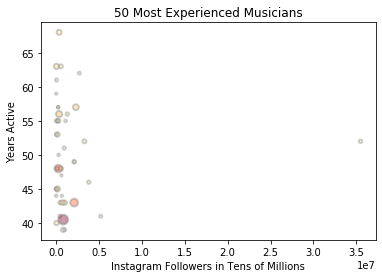

In [40]:
fig, ax = plt.subplots()
x, y, s=older_musicians['Instagram Followers'], older_musicians['Years Active'], older_musicians['Gross Millions']


plt.scatter(x, y, s ,c=s ,cmap="YlOrRd", alpha=0.4, edgecolors="grey", linewidth=2)

ax.set_title('50 Most Experienced Musicians')
plt.xlabel('Instagram Followers in Tens of Millions')
plt.ylabel('Years Active')
plt.show()


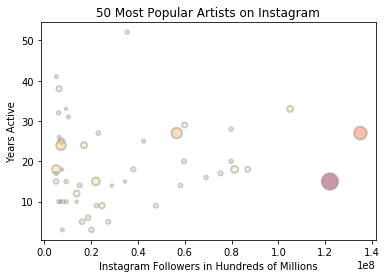

In [41]:
fig, ax = plt.subplots()
x, y, s=ig_famous['Instagram Followers'], ig_famous['Years Active'], ig_famous['Gross Millions']


plt.scatter(x, y, s ,c=s ,cmap="YlOrRd", alpha=0.4, edgecolors="grey", linewidth=2)

ax.set_title('50 Most Popular Artists on Instagram')
plt.xlabel('Instagram Followers in Hundreds of Millions')
plt.ylabel('Years Active')
plt.show()

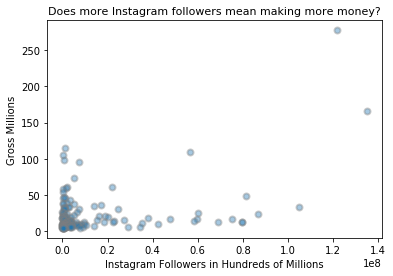

In [42]:
fig, ax = plt.subplots()
x, y=tours2['Instagram Followers'],tours2['Gross Millions']


plt.scatter(x, y,cmap="YlOrRd", alpha=0.4, edgecolors="grey", linewidth=2)

ax.set_title('Does more Instagram followers mean making more money?', fontsize=11)
plt.xlabel('Instagram Followers in Hundreds of Millions')
plt.ylabel('Gross Millions')
plt.show()

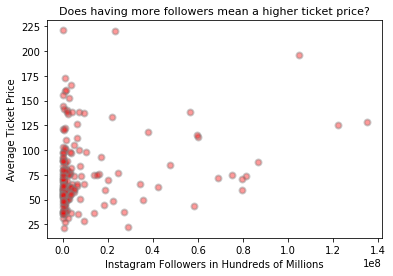

In [43]:
fig, ax = plt.subplots()
x, y=tours2['Instagram Followers'],tours2['Average Ticket Price']


plt.scatter(x, y,c='r', alpha=0.4, edgecolors="grey", linewidth=2)

ax.set_title('Does having more followers mean a higher ticket price?', fontsize=11)
plt.xlabel('Instagram Followers in Hundreds of Millions')
plt.ylabel('Average Ticket Price')
plt.show()

In [44]:
tours2.head(10)

,Rank,Cities,Shows,Gross Millions,Artist,Average Ticket Price,Average Tickets,Total Tickets,Average Gross,Cities/Shows,Agency,Number of Members,Instagram Followers,Years Active
0,1,24,30,277.3,Taylor Swift,124.99,80322,2168706,10271531.0,27/40,Messina Touring Group,1.0,122000000.0,15.0
1,2,45,53,166.4,Jay-Z / Beyonce,128.23,54085,1298038,6935409.0,24/30,Live Nation,2.0,135000000.0,27.0
2,3,40,42,166.0,Eagles,172.13,21428,964245,3688308.0,45/53,Creative Artists Agency,3.0,NaN,34.0
3,4,40,50,114.4,Kenny Chesney,88.15,32443,1297731,2860007.0,40/42,Dale Morris & Associates,1.0,1300000.0,31.0
4,5,21,24,110.0,Justin Timberlake,138.87,19795,791780,2748832.0,40/50,WME,1.0,56600000.0,27.0
5,6,58,60,105.0,Ed Sheeran,92.42,54119,1136497,5001537.0,21/24,Paradigm Talent Agency,1.0,346000.0,15.0
6,7,38,46,97.8,Journey / Def Leppard,97.79,17246,1000272,1686460.0,58/60,CAA / Artist Group International,10.0,823000.0,40.5
7,8,41,183,95.3,Pink,138.46,18120,688558,2508798.0,38/46,Marshall Arts,1.0,7200000.0,24.0
8,9,19,43,88.3,Springsteen On Broadway,508.93,4231,173461,2153146.0,41/183,Thrill Hill Productions,NaN,NaN,55.0
9,10,50,51,79.0,Drake,116.46,35706,678410,4158145.0,19/43,WME,1.0,NaN,18.0


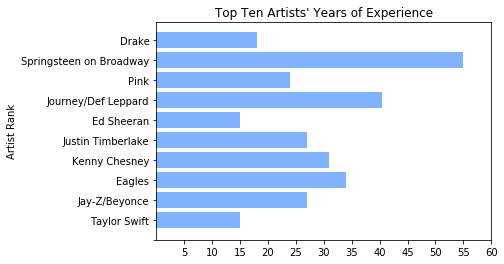

In [45]:
x = (tours2['Rank'][0:10])
y= (tours2['Years Active'][0:10])

p= plt.barh(x, y, align='center', alpha=0.5, color='#0066ff')

plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
#plt.yticks(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
plt.yticks(np.arange(11), (['','Taylor Swift', 'Jay-Z/Beyonce', 'Eagles', 'Kenny Chesney', 'Justin Timberlake', 'Ed Sheeran', 'Journey/Def Leppard', 'Pink', 'Springsteen on Broadway', 'Drake']))
plt.ylabel('Artist Rank')
plt.title("Top Ten Artists' Years of Experience")

plt.show()